In [1]:
import numpy as np
import pandas as pd
import collections
import string, sys, os, re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_columns', 70)

import plotly.express as px
import plotly.io as pio
from IPython.display import Image
from functools import reduce
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df_ms = pd.read_csv(r"../data/msv7.csv")
df_hs = pd.read_csv(r"../data/hsv7.csv")
df_hs.head()

,name,conduct,age,gender,nationality,pob,tutor/makeup,grade,admission,guardian,...,biology,geography,history,civics,amharic,ict,ent-ship,hpe,gpa,matrik
0,abem kibru worku,b,15,m,ethiopian,ethiopia,no,9,paid,both,...,66.37,73.02,72.19,87.43,96.58,71.31,76.26,64.90,74.3,72.6
1,amanuel demeke hailu,a,14,m,ethiopian,ethiopia,no,9,paid,both,...,69.77,74.17,81.65,76.48,84.84,80.42,77.16,86.00,77.9,75.9
2,ananya girma tegegn,a,14,m,ethiopian,ethiopia,no,9,scholarship,both,...,96.27,95.33,83.40,93.05,97.18,94.27,88.76,89.50,92.2,92.6
3,blen amare mesfin,a,15,f,ethiopian,ethiopia,no,9,paid,both,...,79.35,78.50,75.03,83.81,96.15,88.55,83.16,84.00,80.8,78.1
4,dagmawi misganaw bimerew,a,14,m,ethiopian,ethiopia,yes,9,paid,both,...,84.72,85.04,84.30,88.48,94.10,92.66,85.66,93.25,87.5,84.9


In [3]:
ms_filter = df_ms[['residence','previous_school']]
hs_filter = df_hs[['residence','previous_school']]

In [4]:
frames = [ms_filter, hs_filter]
df = pd.concat(frames)

In [5]:
df.residence.value_counts()[:50]

jemo             35
sarbet           24
lebu             23
kality           13
german square    13
bethel           12
haile garment    10
bole             10
torhailoch        9
lafto             8
gerji             7
kolfe             6
ayertena          6
tuludimtu         6
gulele            6
bole bulbula      5
cmc               5
zenebework        5
mekanisa          5
anfo              4
weyra             4
asco              3
furi              3
kazanchis         3
sefera            3
paulos            2
gofa              2
alemgena          2
legetafo          2
arabsa            2
total             2
piassa            2
megenagna         2
gelan             2
meskel flower     2
atena tera        2
wingate           2
ayat              2
bole michael      2
old airport       2
gotera            2
musena            2
saris             2
shola             1
abado             1
russia camp       1
addisu gebeya     1
fm jerba          1
karakore          1
mehandis          1


In [6]:
df['residence'].unique()

array(['ayertena', 'haile garment', 'sarbet', 'gulele', 'meskel flower',
       'torhailoch', 'kality', 'german square', 'bethel', 'gerji', 'jemo',
       'lebu', 'kolfe', 'atena tera', 'bole', 'sefera', 'sululta', 'anfo',
       'welete', 'asco', 'kera', 'zenebework', 'wingate', 'lafto', 'ayat',
       'mekanisa', 'kazanchis', 'bole michael', 'gotera', 'old airport',
       'cmc', 'bole bulbula', 'gofa gabriel', 'kara kore', 'paulos',
       'gelan', 'china camp', 'tulu dimtu', 'weyra', 'gola', 'megenagna',
       'piassa', 'total', 'summit', 'furi', 'mercato', 'legetafo',
       'hana mariam', 'ashewa meda', 'gofa', 'asko', 'riche',
       'russia camp', 'saris', 'alemgena', 'karakore', 'addisu gebeya',
       'arabsa', 'shola', 'fm jerba', 'hayat', 'musena', 'abado',
       'tuludimtu', 'mehandis', 'sefereselam'], dtype=object)

In [7]:
df['residence'] = df['residence'].replace('meskel flower', 'meskelflower')
df['residence'] = df['residence'].replace('meskel flower', 'meskelflower')
df['residence'] = df['residence'].replace('bole michael', 'bolemichael')
df['residence'] = df['residence'].replace('china camp', 'ayertena')
df['residence'] = df['residence'].replace('gofa gabriel', 'gofa')
df['residence'] = df['residence'].replace('hayat', 'bole')
df['residence'] = df['residence'].replace('tulu dimtu', 'tuludimtu')
df['residence'] = df['residence'].replace('kara kore', 'karakore')
df['residence'] = df['residence'].replace('atena tera', 'atenatera')


In [8]:
# unique value counts
counts_df = df['residence'].value_counts().rename_axis('name').reset_index(name='count')
counts_df



,name,count
0,jemo,35
1,sarbet,24
2,lebu,23
3,kality,13
4,german square,13
...,...,...
56,mercato,1
57,summit,1
58,kera,1
59,gola,1


In [9]:
repeated_names = counts_df.query('count > 1').name.to_list()

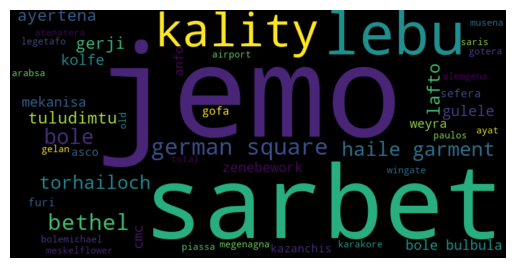

In [10]:

text = " ".join(name for name in df[df.residence.isin(repeated_names)].residence)

# generate a word cloud image
wordcloud = WordCloud(background_color="black", width=800, height=400).generate(text)

# display the word cloud
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()



In [11]:
df.previous_school = df['previous_school'].replace('school of nations', 'schoolofnations')
df.previous_school = df['previous_school'].replace('school of tomorrow', 'schooloftomorrow')
df.previous_school = df['previous_school'].replace('spring of knowledge', 'springofknowledge')
df.previous_school = df['previous_school'].replace('dandii boru', 'dandiiboru')
df.previous_school = df['previous_school'].replace('abune gorgorios', 'abunegorgorios')
df.previous_school = df['previous_school'].replace('greek school', 'greek')
df.previous_school = df['previous_school'].replace('st francis', 'stfrancis')
df.previous_school = df['previous_school'].replace('kebena adventist', 'kebenaadventist')
df.previous_school = df['previous_school'].replace('biruh tesfa', 'biruhtesfa')
df.previous_school = df['previous_school'].replace('school of science', 'schoolofscience')
df.previous_school = df['previous_school'].replace('gofa ps', 'gofa')
df.previous_school = df['previous_school'].replace('alem birhan', 'alembirhan')
df.previous_school = df['previous_school'].replace('yemane birhan', 'yemanebirhan')
df.previous_school = df['previous_school'].replace('meserete edget', 'mesereteedget')



In [12]:
df['previous_school'].value_counts()[:30]

gibson               28
intellectual         28
jemo 2               17
neps                 15
schoolofnations      14
abay                 13
rice                 10
southwest             7
beteseb academy       7
flipper               7
andinet               7
hilltops              7
greek                 6
schooloftomorrow      6
springofknowledge     6
bgis                  4
stanford              4
tuludimtu             3
kotari                3
hidase                3
kebenaadventist       2
swedish               2
biruhtesfa            2
lycee                 2
schoolofscience       2
gofa                  2
abunegorgorios        2
alembirhan            2
dandiiboru            2
stfrancis             2
Name: previous_school, dtype: int64

In [13]:
# unique value counts
counts_df = df['previous_school'].value_counts().rename_axis('name').reset_index(name='count')
counts_df

,name,count
0,gibson,28
1,intellectual,28
2,jemo 2,17
3,neps,15
4,schoolofnations,14
...,...,...
95,bingham,1
96,emmanuel,1
97,netsanet chora,1
98,akaki kality menbere,1


In [14]:
repeated_names = counts_df.query('count > 1').name.to_list()

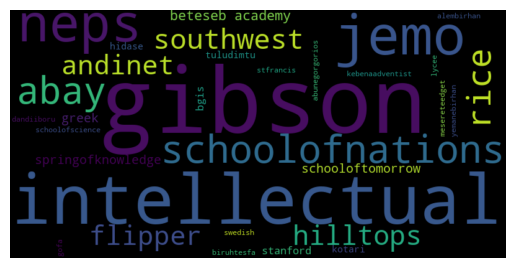

In [15]:

text = " ".join(name for name in df[df.previous_school.isin(repeated_names)].previous_school)

# generate a word cloud image
wordcloud = WordCloud(background_color="black", width=800, height=400).generate(text)

# display the word cloud
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()